Data from Kaggle competition: Cats vs Dogs.
https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data

In [21]:
## Import packages related to keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
## For data handling
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [3]:
import itertools
import os
import shutil
import random
import glob
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

#### Organize data into train, valid, test dirs

In [6]:
path = os.getcwd()
path

'C:\\data_science\\Neural_Network\\Data\\Cats_vs_Dogs'

In [5]:
## Organize data into train, walid, test dirs
os.chdir('Data/Cats_vs_Dogs')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

In [7]:
for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')
    

In [8]:
os.chdir('../../')

In [9]:
path = os.getcwd()
path

'C:\\data_science\\Neural_Network'

#### Make the train, valid, test data batches

In [10]:
train_path = 'Data/Cats_vs_Dogs/train'
valid_path = 'Data/Cats_vs_Dogs/valid'
test_path = 'Data/Cats_vs_Dogs/test'

In [57]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (224, 224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [51]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [52]:
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [58]:
imgs, labels = next(train_batches)

In [15]:
## This function will plot images of a grof with 1 row and 10 columns where images are places.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

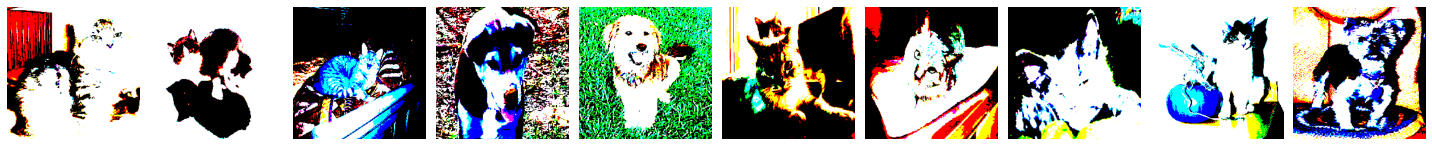

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [59]:
plotImages(imgs)
print(labels)

#### Build and train a CNN

In [22]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224, 224,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax')         
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer = Adam(learning_rate = .0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [25]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose = 2)

Epoch 1/10
100/100 - 71s - loss: 17.4770 - accuracy: 0.5770 - val_loss: 8.8028 - val_accuracy: 0.5450
Epoch 2/10
100/100 - 69s - loss: 2.1620 - accuracy: 0.7780 - val_loss: 3.7729 - val_accuracy: 0.6150
Epoch 3/10
100/100 - 69s - loss: 0.4550 - accuracy: 0.9040 - val_loss: 3.1452 - val_accuracy: 0.6200
Epoch 4/10
100/100 - 71s - loss: 0.1402 - accuracy: 0.9560 - val_loss: 2.0062 - val_accuracy: 0.6650
Epoch 5/10
100/100 - 72s - loss: 0.0580 - accuracy: 0.9780 - val_loss: 2.0448 - val_accuracy: 0.6550
Epoch 6/10
100/100 - 66s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0431 - val_accuracy: 0.6600
Epoch 7/10
100/100 - 64s - loss: 5.6489e-04 - accuracy: 1.0000 - val_loss: 2.0178 - val_accuracy: 0.6700
Epoch 8/10
100/100 - 64s - loss: 4.3280e-04 - accuracy: 1.0000 - val_loss: 2.0115 - val_accuracy: 0.6650
Epoch 9/10
100/100 - 61s - loss: 3.7454e-04 - accuracy: 1.0000 - val_loss: 2.0109 - val_accuracy: 0.6700
Epoch 10/10
100/100 - 69s - loss: 3.2915e-04 - accuracy: 1.0000 - val_loss: 2.

#### Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

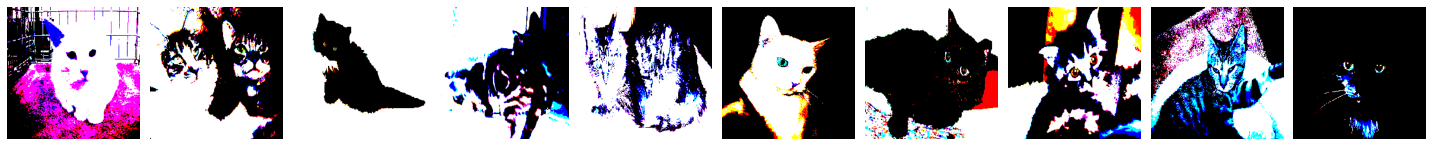

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [53]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [28]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
preds = model.predict(x = test_batches, verbose = 0)

In [30]:
np.round(preds)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_batches.classes, np.argmax(preds, axis = -1))
cm

array([[38, 12],
       [18, 32]], dtype=int64)

#### Build Fine-tuned VGG16 model

In [32]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

553467904/553467096 [==============================] - 197s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [33]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [34]:
params = count_params(vgg16_model)
params

{'non_trainable_params': 0.0, 'trainable_params': 138357544}

In [35]:
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [39]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [41]:
for layer in model.layers:
    layer.trainable = False

In [42]:
model.add(Dense(units = 2, activation = 'softmax'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [44]:
model.compile(optimizer = Adam(learning_rate = .0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [46]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 5, verbose = 2)

Epoch 1/5
100/100 - 458s - loss: 0.2512 - accuracy: 0.8990 - val_loss: 0.1292 - val_accuracy: 0.9300
Epoch 2/5
100/100 - 432s - loss: 0.0982 - accuracy: 0.9660 - val_loss: 0.0881 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 516s - loss: 0.0689 - accuracy: 0.9820 - val_loss: 0.0831 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 471s - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0690 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 422s - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0701 - val_accuracy: 0.9700


In [47]:
model.history.history.get('accuracy')[-1]

0.9890000224113464

In [48]:
preds_vgg16 = model.predict(x = test_batches, verbose = 0)

In [49]:
cm = confusion_matrix(test_batches.classes, np.argmax(preds_vgg16, axis = -1))
cm

array([[47,  3],
       [ 1, 49]], dtype=int64)